Initialise, set the path and import librarys

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
currPth = os.getcwd()
print(currPth)
import sys
sys.path.append("//home/ubuntu/fastai/") # go to parent dir

/home/ubuntu/fastai/courses/data/EnergyPriceDLModel


    (For some reason I have to tell FastAI where the parent dir is)

Import everything needed

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.dataset import *
from fastai.plots import *

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

from IPython.display import HTML

In [4]:
PATH="//home/ubuntu/fastai/courses/data/EnergyPriceDLModel/"

Set the Training & Testing data sets, import them from csv, parse the Date Column, have a look at it

In [5]:
data_Train = pd.read_csv(f'{PATH}TrainAll_100CAvg.csv', parse_dates=['DateTime'])
data_Train.head(20)

,DateTime,Demand,Price,MaxTemp,MinTemp,Rainfall
0,2000-01-01 02:30:00,3615.71333,18.55,27.0,21.0,0.01
1,2000-01-01 05:30:00,3280.89333,17.50,27.0,21.0,0.01
2,2000-01-01 08:30:00,3801.56833,17.46,27.0,21.0,0.01
3,2000-01-01 11:30:00,4185.38833,18.56,27.0,21.0,0.01
4,2000-01-01 14:30:00,4087.32500,17.50,27.0,21.0,0.01
5,2000-01-01 17:30:00,4283.08500,20.72,27.0,21.0,0.01
6,2000-01-01 20:30:00,4460.78833,23.16,27.0,21.0,0.01
7,2000-01-01 23:30:00,4349.14833,25.87,27.0,21.0,0.01
8,2000-02-01 02:30:00,3365.96500,18.62,27.0,18.0,0.01
9,2000-02-01 05:30:00,3296.95667,16.80,27.0,18.0,0.01


In [6]:
data_Test = pd.read_csv(f'{PATH}Test_100CAvg.csv', parse_dates=['DateTime'])
data_Test.head(20)

,Id,DateTime,Demand,MaxTemp,MinTemp,Rainfall
0,1,2018-01-04 02:30:00,5356.05,28.9,20.1,0.01
1,2,2018-01-04 05:30:00,5384.68,28.9,20.1,0.01
2,3,2018-01-04 08:30:00,5678.77,28.9,20.1,0.01
3,4,2018-01-04 11:30:00,5749.00,28.9,20.1,0.01
4,5,2018-01-04 14:30:00,6026.71,28.9,20.1,0.01
5,6,2018-01-04 17:30:00,6802.71,28.9,20.1,0.01
6,7,2018-01-04 20:30:00,6685.91,28.9,20.1,0.01
7,8,2018-01-04 23:30:00,6052.47,28.9,20.1,0.01
8,9,2018-02-04 02:30:00,5345.31,28.6,20.7,0.40
9,10,2018-02-04 05:30:00,5383.65,28.6,20.7,0.40


Check lengths of data set

In [7]:
len(data_Train)

53318

In [8]:
len(data_Test)

488

Add Extra Date information

In [9]:
add_datepart(data_Train, "DateTime", drop=False)

In [10]:
add_datepart(data_Test, "DateTime", drop=False)

Adjust Columns, discard unnecessary data

In [9]:
data_Train.columns

Index(['DateTime', 'Demand', 'Price', 'MaxTemp', 'MinTemp', 'Rainfall'], dtype='object')

In [10]:
data_Test.columns

Index(['Id', 'DateTime', 'Demand', 'MaxTemp', 'MinTemp', 'Rainfall'], dtype='object')

In [13]:
#columns = ['DateTimeIs_month_end','MaxTemp', 'MinTemp', 'Rainfall',
#       'DateTimeIs_month_start', 'DateTimeIs_quarter_end',
#       'DateTimeIs_quarter_start', 'DateTimeIs_year_end',
#       'DateTimeIs_year_start','DateTimeElapsed']

In [11]:
columns = ['MaxTemp', 'MinTemp', 'Rainfall']

In [12]:
data_Train.drop(columns,1,inplace=True)

In [13]:
data_Test.drop(columns,1,inplace=True)

In [14]:
data_Train.columns

Index(['DateTime', 'Demand', 'Price'], dtype='object')

In [15]:
data_Test.columns

Index(['Id', 'DateTime', 'Demand'], dtype='object')

Backup to feather

In [16]:
data_Train.reset_index(inplace=True)
data_Test.reset_index(inplace=True)

In [17]:
data_Train.to_feather(f'{PATH}df')
data_Test.to_feather(f'{PATH}df_test')

Load the data from Feather

In [18]:
data_Train = pd.read_feather(f'{PATH}df')

In [19]:
data_Test= pd.read_feather(f'{PATH}df_test')

Convert DateTime to datetime for both datasets

In [20]:
data_Train["DateTime"] = pd.to_datetime(data_Train.DateTime)

In [21]:
data_Test["DateTime"] = pd.to_datetime(data_Test.DateTime)

Check data

In [22]:
data_Train.columns

Index(['index', 'DateTime', 'Demand', 'Price'], dtype='object')

In [23]:
data_Train.head().T.head(12)

,0,1,2,3,4
index,0,1,2,3,4
DateTime,2000-01-01 02:30:00,2000-01-01 05:30:00,2000-01-01 08:30:00,2000-01-01 11:30:00,2000-01-01 14:30:00
Demand,3615.71,3280.89,3801.57,4185.39,4087.32
Price,18.55,17.5,17.46,18.56,17.5


Set Category and Continuous Variables

In [24]:
cat_vars = ['DateTime']
contin_vars = ['Demand']
n = len(data_Train); n

53318

In [27]:
dep = 'Price'
data_Train = data_Train[cat_vars+contin_vars+[dep, 'DateTime']].copy()

In [28]:
data_Test[dep] = 0
data_Test = data_Test[cat_vars+contin_vars+[dep, 'DateTime', 'Id']].copy()

In [29]:
for v in cat_vars: data_Train[v] = data_Train[v].astype('category').cat.as_ordered()

In [30]:
data_Test.columns

Index(['DateTimeYear', 'DateTimeMonth', 'DateTimeWeek', 'DateTimeDay',
       'DateTimeDayofweek', 'DateTimeDayofyear', 'Demand', 'Price', 'DateTime',
       'Id'],
      dtype='object')

In [31]:
data_Train.columns

Index(['DateTimeYear', 'DateTimeMonth', 'DateTimeWeek', 'DateTimeDay',
       'DateTimeDayofweek', 'DateTimeDayofyear', 'Demand', 'Price',
       'DateTime'],
      dtype='object')

In [32]:
apply_cats(data_Test, data_Train)

Set Continuous Variables to Float32

In [33]:
for v in contin_vars:
    data_Train[v] = data_Train[v].astype('float32')
    data_Test[v] = data_Test[v].astype('float32')

Set DateTime as index for both

In [34]:
data_Train = data_Train.set_index("DateTime")

In [35]:
data_Test = data_Test.set_index("DateTime")

Split off response variable (Price) and convert dataframe to entirely numeric data

In [36]:
df, y, nas, mapper = proc_df(data_Train, 'Price', do_scale=True)
yl = np.log(y)

In [37]:
df_test, _, nas, mapper = proc_df(data_Test, 'Price', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

Set validation set to last 25% of Training set

In [38]:
samp_size = len(df)

In [39]:
train_ratio = 0.65
#train_ratio = 0.75
#train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

Define Root-mean-squared percent error to use as metric

In [40]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

Create ModelData from DataFrame

In [41]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=32,
                                      test_df=df_test)

Use the cardinal for each Categorical variable for embeddings

In [108]:
cat_sz = [(c, len(data_Train[c].cat.categories)+1) for c in cat_vars]

In [109]:
cat_sz

[('DateTimeYear', 20),
 ('DateTimeMonth', 13),
 ('DateTimeWeek', 54),
 ('DateTimeDay', 32),
 ('DateTimeDayofweek', 8),
 ('DateTimeDayofyear', 367)]

In [110]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [111]:
emb_szs

[(20, 10), (13, 7), (54, 27), (32, 16), (8, 4), (367, 50)]

Find a Learning Rate

In [115]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [116]:
m.lr_find()

 59%|█████▉    | 644/1083 [00:03<00:02, 168.84it/s, loss=0.446] 


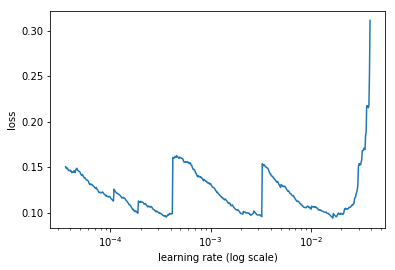

In [117]:
m.sched.plot(100)

Have a Look at the model

In [56]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(5, 3)
    (1): Embedding(13, 7)
    (2): Embedding(53, 27)
    (3): Embedding(32, 16)
    (4): Embedding(8, 4)
    (5): Embedding(367, 50)
    (6): Embedding(3, 2)
    (7): Embedding(3, 2)
    (8): Embedding(3, 2)
    (9): Embedding(3, 2)
    (10): Embedding(3, 2)
    (11): Embedding(3, 2)
  )
  (lins): ModuleList(
    (0): Linear(in_features=123, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1, bias=True)
  (emb_drop): Dropout(p=0.04)
  (drops): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True)
)

Do some initial learning

In [118]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 0.005

In [119]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.089944   0.413164   51.935488 
    1      0.066239   0.449577   48.060328                       
    2      0.053422   0.353184   50.978578                       



[array([0.35318]), 50.97857808413754]

In [120]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.064483   0.368151   50.927671 
    1      0.086711   0.367959   50.012966                       
    2      0.049394   0.372675   49.996455                       
    3      0.044743   0.382898   49.073379                       
    4      0.060562   0.373521   50.915204                       



[array([0.37352]), 50.915203694620295]

In [121]:
m.unfreeze()

In [122]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.072125   0.344874   53.12479  
    1      0.075574   0.359871   50.923075                       
    2      0.038176   0.356314   50.584174                       
    3      0.035183   0.36159    49.838662                       
    4      0.090855   0.390124   51.803631                       
    5      0.04686    0.380363   48.058074                       
    6      0.03815    0.362115   49.752141                       
    7      0.052303   0.359938   49.951877                       



[array([0.35994]), 49.95187705078758]

All

In [123]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.01, 1, [1000,500], [0.01,0.05], y_range=y_range)
lr = 0.005

In [124]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.09234    0.473261   40.932356 
    1      0.071429   0.415352   47.695736                       
    2      0.101296   0.420178   43.382157                       



[array([0.42018]), 43.382157233562694]

In [125]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.051187   0.388244   45.75097  
    1      0.050002   0.395741   43.395051                       



[array([0.39574]), 43.39505146318406]

In [126]:
m.fit(lr, 1, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.076085   0.388582   44.383719 



[array([0.38858]), 44.38371920481355]